### Directing customer to subscription using app behavious: 

In [61]:
# Importing the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [3]:
# Extracting the dataset: 
df = pd.read_csv('appdata10.csv')
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


### EDA: 

In [4]:
# Shape of the dataset:
df.shape

(50000, 12)

In [6]:
# Knowing more about our dataset: 
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# The datatypes:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
# Scanning for any nan or missing info: 
df.isna().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [9]:
# Changing the format of hour variable: 
df['hour'] = df['hour'].str.slice(1,3).astype(int)

In [10]:
# Viewing the dataset: 
# Notice the format of the hour is now changed: 
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


#### EDA : Plotting: 

In [11]:
# Making a temp dataframe: 
df_temp = df.copy()

In [12]:
# Dropping the unwanted cols: 
cols = ['user','first_open','screen_list','enrolled_date','enrolled']
df_temp = df_temp.drop(columns=cols)

In [13]:
# Viewing the dataset: 
df_temp.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [19]:
# Datatypes: 
df_temp.dtypes

dayofweek               int64
hour                    int32
age                     int64
numscreens              int64
minigame                int64
used_premium_feature    int64
liked                   int64
dtype: object

In [14]:
# Shape of the temp dataframe: 
df_temp.shape

(50000, 7)

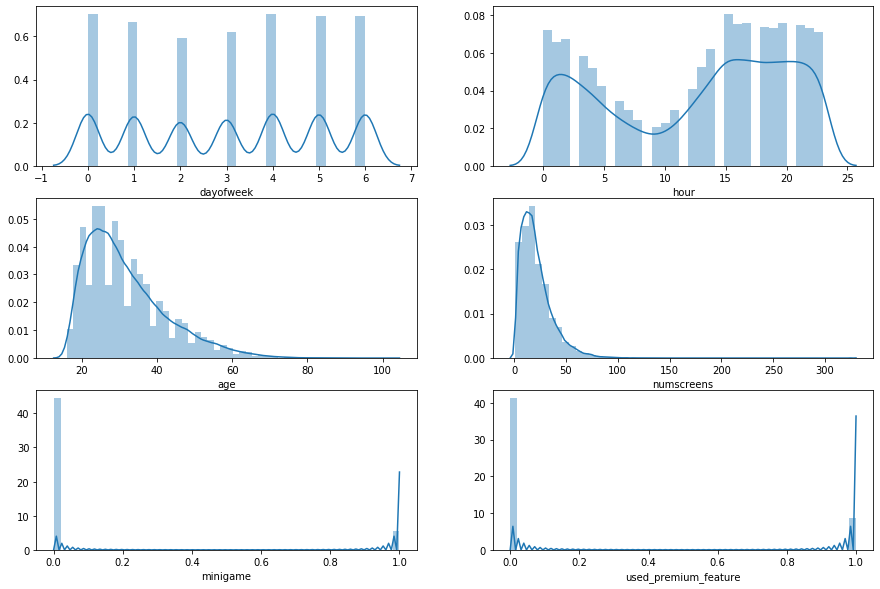

In [26]:
# Plotting: 
f, axes = plt.subplots(3,2, figsize = (15,10))
col = 0
for i in range(0,3):
    for j in range(0,2):
        if col < 6:
            sns.distplot(df_temp.iloc[:,col], ax = axes[i][j])
            col = col + 1
plt.show()

In [20]:
df_temp.isna().sum()

dayofweek               0
hour                    0
age                     0
numscreens              0
minigame                0
used_premium_feature    0
liked                   0
dtype: int64

In [21]:
df_temp.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'],
      dtype='object')

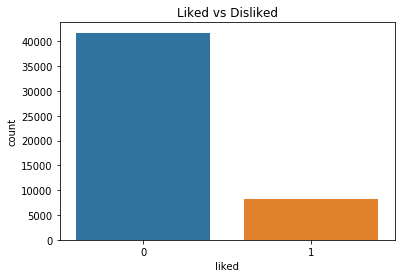

In [36]:
# The number of people who liked the application: 
sns.countplot(df_temp.liked)
plt.title("Liked vs Disliked")
plt.show()

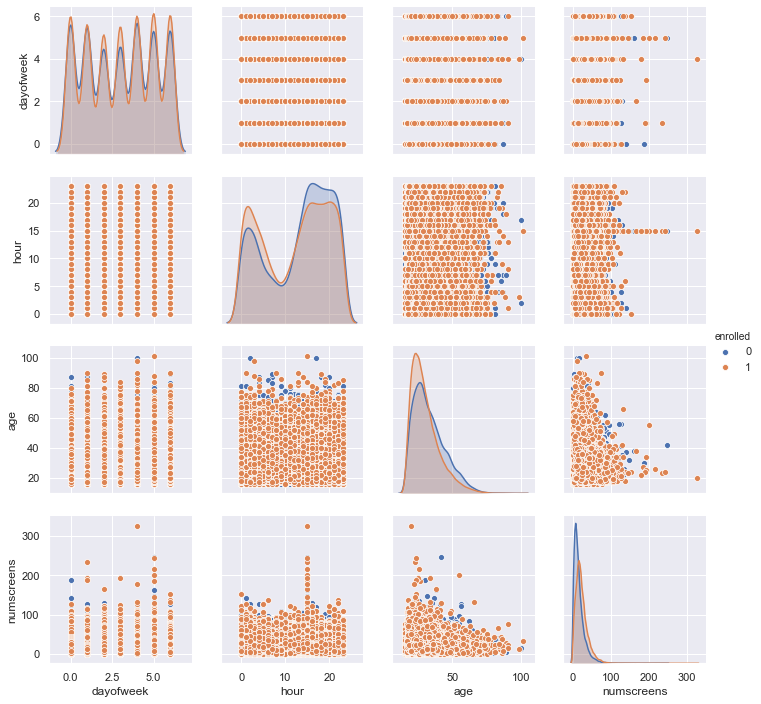

In [41]:
# Plotting the pair plot: 
sns.set(font_scale=1)
sns.pairplot(df, hue = 'enrolled', vars = ['dayofweek', 'hour', 'age', 'numscreens'])
plt.show()

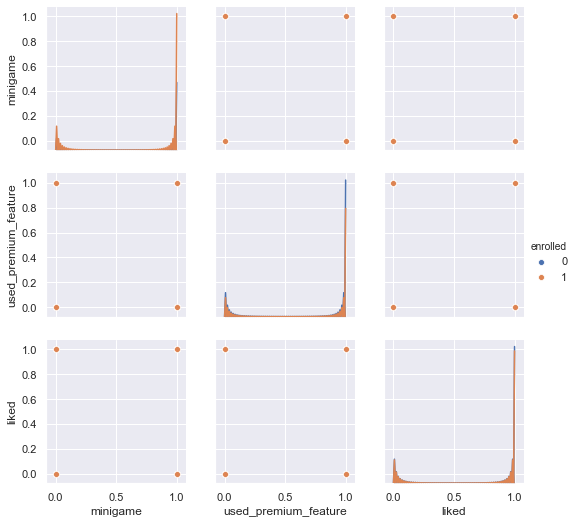

In [42]:
# Plotting the pair plot: 
sns.set(font_scale=1)
sns.pairplot(df, hue = 'enrolled', vars = ['minigame','used_premium_feature', 'liked'])
plt.show()

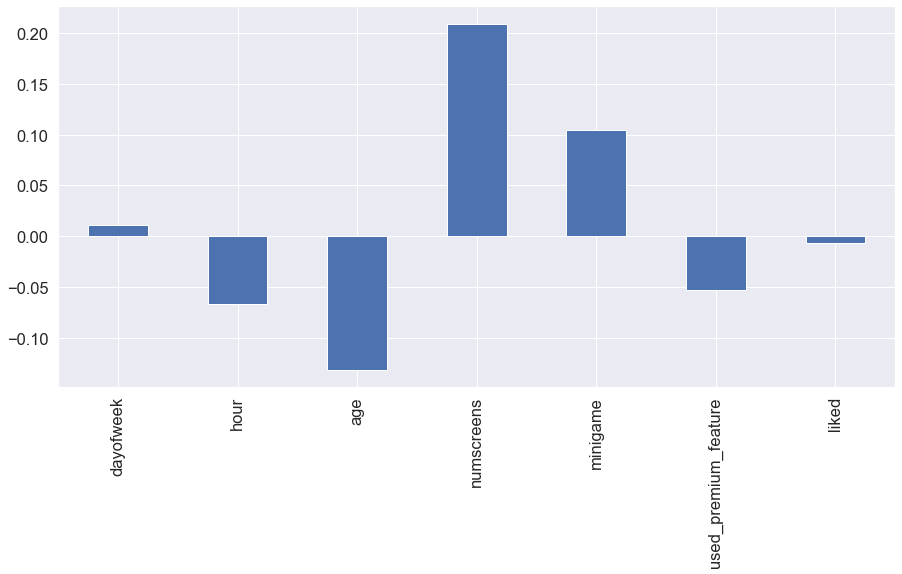

In [57]:
# The correlation plot: 
sns.set(font_scale=1.5)
plt.figure(figsize=(15,7))
df_temp.corrwith(df.enrolled).plot.bar()
plt.show()

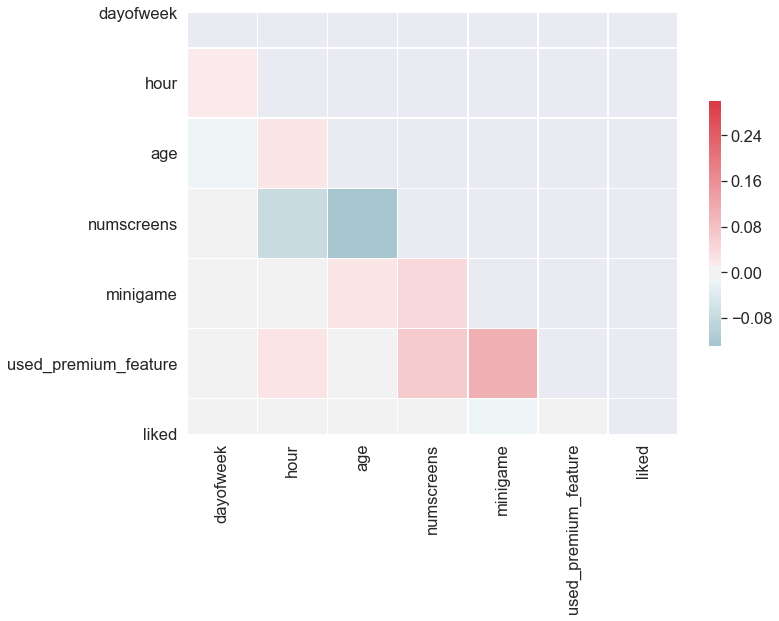

In [59]:
# The correlation martix: 
# Compute the correlation matrix
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Feature Engineering: 

In [60]:
# Viewing the dataset again: 
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [73]:
# Converting data column from str to date data-type: 
df['first_open'] = [parser.parse(row) for row in df['first_open']]
df['enrolled_date'] = [parser.parse(row) if isinstance(row, str) else row for row in df['enrolled_date']]

In [74]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [75]:
# Creating a new col:
df['Duration'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')

In [76]:
# Viewing the dataset again: 
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Duration
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


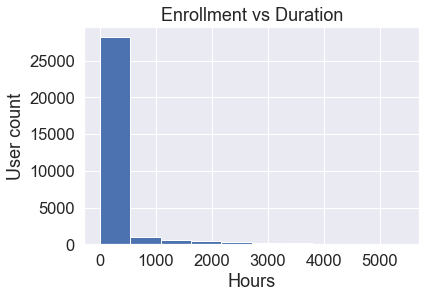

In [80]:
# Plotting the difference: 
plt.hist(df['Duration'].dropna())
plt.xlabel('Hours')
plt.ylabel('User count')
plt.title('Enrollment vs Duration')
plt.show()

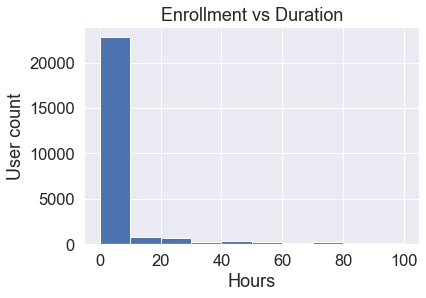

In [82]:
# Plotting the difference: 
plt.hist(df['Duration'].dropna(), range = [0,100])
plt.xlabel('Hours')
plt.ylabel('User count')
plt.title('Enrollment vs Duration')
plt.show()

In [84]:
# Assuming uners enroll within 48 hours of app useage: 
df.loc[df.Duration > 48, 'enrolled'] = 0

In [85]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Duration
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


In [86]:
# Dropping the unwanted columns: 
df = df.drop(columns=['first_open','Duration','enrolled_date'])

In [87]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

In [91]:
df.shape

(50000, 10)

##### Working to fix the screens: 

In [95]:
# Loading the datafile containing top screen. 
# This is the dataset provided by the BU
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [96]:
# Knowing more about top screens: 
top_screens.shape

(58,)

In [97]:
# Creating a seperate colums for top screens: 
df['screen_list'] = df.screen_list.astype(str)+','
for i in top_screens:
    df[i] = df.screen_list.str.contains(i).astype(int)
    df['screen_list'] = df.screen_list.str.replace(i+',',"")

In [98]:
df['others'] = df.screen_list.str.count(',')

In [99]:
df = df.drop(columns=['screen_list'])

In [100]:
# Viewing the dataset again: 
df.shape

(50000, 68)

In [101]:
df.dtypes

user               int64
dayofweek          int64
hour               int32
age                int64
numscreens         int64
                   ...  
ResendToken        int32
TransactionList    int32
NetworkFailure     int32
ListPicker         int32
others             int64
Length: 68, dtype: object

In [102]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,others
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


##### Grouping similar screens to reduce columns: 

In [103]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

df['saving_screen'] = df[savings_screens].sum(axis = 1)
df = df.drop(columns=savings_screens)

In [104]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]

df['Credit'] = df[cm_screens].sum(axis = 1)
df = df.drop(columns = cm_screens)

In [105]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df['cc'] = df[cc_screens].sum(axis = 1)
df = df.drop(columns = cc_screens)

In [106]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df['Loan'] = df[loan_screens].sum(axis = 1)
df = df.drop(columns=loan_screens)

#### End of feature engineering: 

In [107]:
# Viewing the final dataset: 
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,saving_screen,Credit,cc
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000


In [108]:
# Shape: 
df.shape

(50000, 49)

In [109]:
# Columns: 
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'others',
       'saving_screen', 'Credit', 'cc'],
      dtype='object')

In [110]:
# The dataframe view: 
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,saving_screen,Credit,cc
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,10,0,2,0


In [111]:
# Saving the new dataset: 
df.to_csv('refined_appdata10.csv', index = False)

### Data Preprocessing: 

In [115]:
# Loading the dataset: 
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,saving_screen,Credit,cc
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,10,0,2,0


In [118]:
# All the columns: 
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'others',
       'saving_screen', 'Credit', 'cc'],
      dtype='object')

In [121]:
# Defining x and y: 
x = df.copy()
x = x.drop(columns = ['enrolled'])
x = x.drop(columns = ['user'])

y = df['enrolled']

In [122]:
# Splitting the dataset into test and train: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [123]:
# Feature scaling the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_temp = pd.DataFrame(sc.fit_transform(x_train))
x_train_temp.index = x_train.index.values
x_train_temp.columns = x_train.columns.values
x_train = x_train_temp.copy()

x_test_temp = pd.DataFrame(sc.transform(x_test))
x_test_temp.index = x_test.index.values
x_test_temp.columns = x_test_temp.columns.values
x_test = x_test_temp.copy()

In [124]:
# Viewing x_train: 
x_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,saving_screen,Credit,cc
39087,0.973675,0.733014,0.118913,4.130060,2.874639,-0.455413,2.248151,0.964094,1.553374,0.951237,...,3.058099,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,2.523681,-0.286224
30893,-0.013074,1.002138,-1.365092,-0.259741,-0.347870,-0.455413,2.248151,0.964094,-0.643760,0.951237,...,3.058099,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.213608,-0.260327,-0.759770,-0.286224
45278,-0.013074,1.405822,1.510167,-0.768703,-0.347870,-0.455413,-0.444810,-1.037243,-0.643760,-1.051262,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-1.143020,1.870010,-0.759770,-0.286224
16398,-0.013074,-1.150848,-0.808590,-0.514222,-0.347870,2.195807,2.248151,0.964094,-0.643760,0.951237,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.484933,-0.260327,-0.759770,-0.286224
13653,-1.493199,-1.285410,-0.715840,-0.386982,-0.347870,-0.455413,-0.444810,0.964094,-0.643760,0.951237,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.600369,-0.260327,-0.759770,-0.286224


In [125]:
# Viewing x_test: 
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
33553,-0.506449,0.194768,-0.066588,1.839729,-0.34787,-0.455413,-0.444810,-1.037243,1.553374,-1.051262,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.329043,1.870010,0.061093,-0.286224
9427,-1.493199,-0.074355,1.973918,-1.086805,-0.34787,-0.455413,-0.444810,-1.037243,-0.643760,-1.051262,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.600369,-0.260327,-0.759770,-0.286224
199,-0.999824,0.733014,-0.901340,-0.832324,-0.34787,-0.455413,-0.444810,0.964094,-0.643760,-1.051262,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.871694,-0.260327,-0.759770,-0.286224
12447,-0.999824,-1.285410,0.118913,-0.068880,-0.34787,-0.455413,-0.444810,-1.037243,-0.643760,-1.051262,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,-0.871694,-0.260327,0.881955,-0.286224
39489,-1.493199,-1.419972,0.211663,0.567323,-0.34787,-0.455413,2.248151,0.964094,1.553374,0.951237,...,-0.327001,-0.119912,-0.115101,-0.116321,-0.091485,-0.086343,0.484933,-0.260327,1.702818,-0.286224


### Building the model: 

In [133]:
# Classification using Logistic regression: 
from sklearn.linear_model import LogisticRegression
calssifier = LogisticRegression(random_state=0, solver = 'lbfgs')
# Fitting the model: 
calssifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
# Using the model for prediction: 
y_pred = calssifier.predict(x_test)

In [135]:
# Using the confusion metrix to validate the prediction: 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Correct Prediction:', np.sum(np.diagonal(cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(cm)))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred),4)*100)+'%')
print('Precision:',str(round(precision_score(y_test, y_pred),4)*100)+'%')

[[3878 1227]
 [1094 3801]]
Correct Prediction: 7679
Incorrect Prediction: 2321
Accuracy: 76.79%
Precision: 75.6%


In [136]:
# Applying K fold cross validation: 
from sklearn.model_selection import cross_val_score
kfold = cross_val_score(calssifier, x_train, y_train, cv= 10)

In [137]:
# The array of 10 accuries: 
kfold

array([0.75706073, 0.76380905, 0.76605849, 0.76905774, 0.76505874,
       0.76794199, 0.76694174, 0.76569142, 0.75193798, 0.7531883 ])

In [151]:
# Mean accuracy: 
round(kfold.mean(),4)

0.7627

### Model Tuning: 

In [158]:
from sklearn.model_selection import GridSearchCV
penalty = ['l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
params = {'C': C, 'penalty':penalty}

In [159]:
grid_search = GridSearchCV(param_grid=params, estimator=calssifier, cv = 10, scoring='accuracy')

In [160]:
# Fitting the grid search: 
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [161]:
# Choosing the best estimator: 
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
# Best best parameters
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [163]:
# Best scroing: 
grid_search.best_score_

0.76295

In [164]:
# Predicting using the grid
y_pred_grid = grid_search.predict(x_test)

In [165]:
cm_grid = confusion_matrix(y_test, y_pred_grid)
print(cm_grid)
print('Correct Prediction:', np.sum(np.diagonal(cm_grid)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(cm_grid)))
print('Accuracy:', str(round(accuracy_score(y_test, y_pred_grid),4)*100)+'%')
print('Precision:',str(round(precision_score(y_test, y_pred_grid),4)*100)+'%')

[[3877 1228]
 [1090 3805]]
Correct Prediction: 7682
Incorrect Prediction: 2318
Accuracy: 76.82%
Precision: 75.6%
